Implement a simple deep neural network for solving the polynomial y = 5x^3 - 8x^2 - 7x + 1 with the following specifications:

- Use three hidden-layers of sizes 32, 64, and 128 and display the generated DNN with the required number of parameters.
- Generate training samples within the range of -20 to +20. Use the appropriate method for normalizing the training data in the range of -1 to +1.
- Use 5% of the samples as test data and 5% of the samples as validation data and the rest of the data for training the DNN with and appropriate number of epochs.
- Display the training accuracy vs validation accuracy and training error vs validation error curves.
- After training, use the test data for prediction and display the prediction accuracy vs true levels of the test data.

In [48]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense # type: ignore
from keras.models import Model # type: ignore

In [49]:
# creating the data set
x = np.random.uniform(-20, 20, 50000)
y = 5 * x**3 - 8 * x ** 2 - 7 * x + 1

x_data = (2 * (x - np.min(x)) / (np.max(x) - np.min(x))) - 1
y_data = (2 * (y - np.min(y)) / (np.max(y) - np.min(y))) - 1

In [50]:
# spliting the dataset into training and testing
size = len(x_data)

x_train, y_train = x_data[: int(size * 0.90)], y_data[: int(size * 0.90)]
x_val, y_val = x_data[int(size * 0.90) : int(size * 0.95)], y_data[int(size * 0.90) : int(size * 0.95)]
x_test, y_test = x_data[int(size * 0.95) : ], y_data[int(size * 0.95) :]

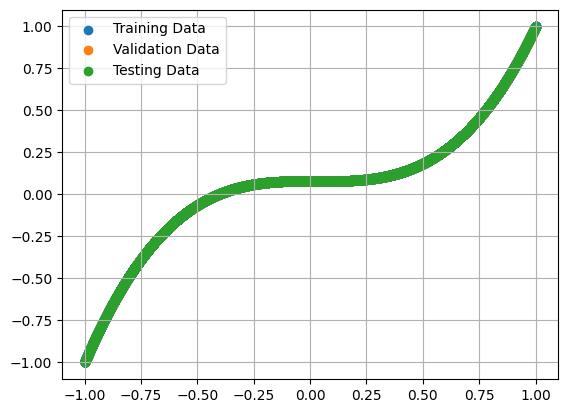

In [51]:
# ploting the dataset
plt.scatter(x_train, y_train, label = "Training Data")
plt.scatter(x_val, y_val, label = "Validation Data")
plt.scatter(x_test, y_test, label = "Testing Data")
plt.legend()
plt.grid()
plt.show()

In [52]:
# building model
inputs = Input((1,))
x = Dense(32, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(1, name='Output_layer')(x)

model = Model(inputs, outputs, name="DNN")
model.summary()

Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
# training the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics = [tf.keras.metrics.R2Score(name = "accuracy")])
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), verbose=0)
print(history.history)

{'accuracy': [0.9876474142074585, 0.9999232292175293, 0.9998313188552856, 0.9998582005500793, 0.9998534321784973, 0.9997785091400146, 0.9999245405197144, 0.999847948551178, 0.9999344944953918, 0.9998181462287903, 0.9999455213546753, 0.9999439716339111, 0.999903678894043, 0.9998655319213867, 0.9999606609344482, 0.9999428391456604, 0.9999170303344727, 0.999961256980896, 0.9999114274978638, 0.9999331831932068, 0.9999528527259827, 0.9999577403068542, 0.9999021887779236, 0.9999736547470093, 0.999935507774353, 0.9999679327011108, 0.9999164342880249, 0.9999686479568481, 0.9999403357505798, 0.9998986124992371, 0.9999925494194031, 0.9999291300773621, 0.9999759793281555, 0.9998695850372314, 0.9999881982803345, 0.9999474287033081, 0.9999629259109497, 0.9999757409095764, 0.9999290704727173, 0.9999693632125854, 0.9999403953552246, 0.999972939491272, 0.9999123215675354, 0.9999933838844299, 0.9999154806137085, 0.9999945163726807, 0.9999426603317261, 0.99997878074646, 0.9999696016311646, 0.99996733665

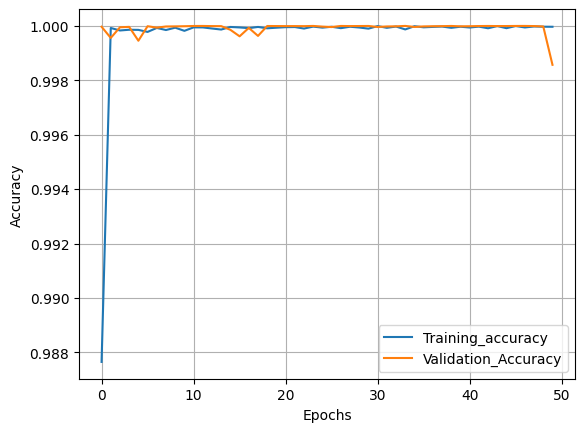

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training_accuracy", "Validation_Accuracy"])
plt.grid()
plt.show()

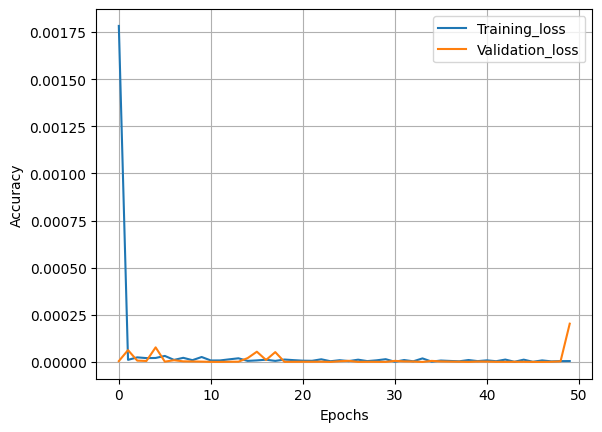

In [56]:
# ploting the training and validation loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["Training_loss", "Validation_loss"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [58]:
# evaluating the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss*100:.4f}%")
print(f"Test Accuracy: {test_acc*100:.4f}%")

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.9985 - loss: 2.2680e-04
Test Loss: 0.0219%
Test Accuracy: 99.8504%


In [59]:
# making predictions
predictions = model.predict(x_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step


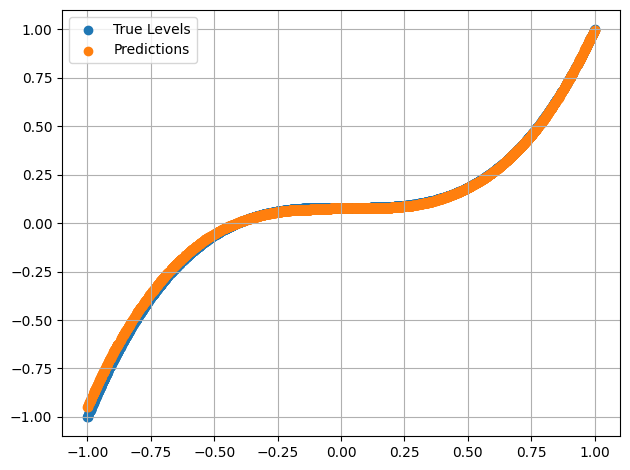

In [60]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, predictions)
plt.legend(["True Levels", "Predictions"])
plt.tight_layout()
plt.grid()
plt.show()